In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
# function for finding wind speed at each location
def wind_speed(u_h,v_h,lt,llat,llon):
    speed_h=np.zeros((lt,llat,llon))
    for i in range (lt):
        speed_h[i]=np.sqrt((u_h[i,:,:])**2+(v_h[i,:,:])**2)
    return(speed_h)

-----------------------------ERA  2018---------------------------------

In [3]:
era18=xr.open_dataset('/work/uo1075/b381754/data/DATA/ERA/2018/ws_2018_Jan_Dec_3H.nc').\
sel(valid_time=slice('2018-01-01T00:00:00.000000000','2018-06-30T23:00:00.000000000')).load()

In [4]:
era18

<xarray.Dataset>
Dimensions:     (valid_time: 1448, latitude: 289, longitude: 361)
Coordinates:
    number      int64 0
  * valid_time  (valid_time) datetime64[ns] 2018-01-01 ... 2018-06-30T21:00:00
  * latitude    (latitude) float64 71.0 70.75 70.5 70.25 ... -0.5 -0.75 -1.0
  * longitude   (longitude) float64 -84.0 -83.75 -83.5 -83.25 ... 5.5 5.75 6.0
    expver      (valid_time) object '0001' '0001' '0001' ... '0001' '0001'
Data variables:
    u10         (valid_time, latitude, longitude) float32 0.6324 ... 1.797
    v10         (valid_time, latitude, longitude) float32 2.096 2.013 ... 4.651
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-11-01T19:25 GRIB to CDM+CF via cfgrib-0.9.1...

In [5]:
wse=wind_speed(era18['u10'],era18['v10'],len(era18['valid_time']),len(era18['latitude']),len(era18['longitude']))

In [6]:
era18['wsera']=(['valid_time','latitude','longitude'],wse)

In [7]:
era18

<xarray.Dataset>
Dimensions:     (valid_time: 1448, latitude: 289, longitude: 361)
Coordinates:
    number      int64 0
  * valid_time  (valid_time) datetime64[ns] 2018-01-01 ... 2018-06-30T21:00:00
  * latitude    (latitude) float64 71.0 70.75 70.5 70.25 ... -0.5 -0.75 -1.0
  * longitude   (longitude) float64 -84.0 -83.75 -83.5 -83.25 ... 5.5 5.75 6.0
    expver      (valid_time) object '0001' '0001' '0001' ... '0001' '0001'
Data variables:
    u10         (valid_time, latitude, longitude) float32 0.6324 ... 1.797
    v10         (valid_time, latitude, longitude) float32 2.096 2.013 ... 4.651
    wsera       (valid_time, latitude, longitude) float64 2.189 2.185 ... 4.986
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-11-01T19:25 GRIB to CDM+CF via cfgrib-0.9.1...

In [8]:
era18m=era18.mean(dim='valid_time')

In [9]:
era18m

<xarray.Dataset>
Dimensions:    (latitude: 289, longitude: 361)
Coordinates:
    number     int64 0
  * latitude   (latitude) float64 71.0 70.75 70.5 70.25 ... -0.5 -0.75 -1.0
  * longitude  (longitude) float64 -84.0 -83.75 -83.5 -83.25 ... 5.5 5.75 6.0
Data variables:
    u10        (latitude, longitude) float32 0.7053 0.8256 ... 0.8198 0.8798
    v10        (latitude, longitude) float32 -0.5328 -0.5842 ... 3.637 3.568
    wsera      (latitude, longitude) float64 4.615 4.604 4.631 ... 4.176 4.129

In [10]:
slate=era18m['latitude']
slone=era18m['longitude']
wsera=era18m['wsera']
u10era=era18m['u10']
v10era=era18m['v10']

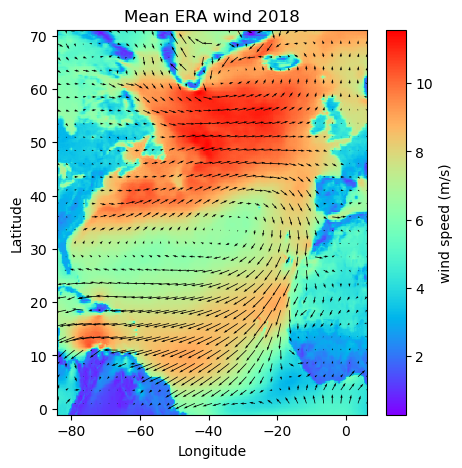

In [11]:
fig, axes = plt.subplots(figsize=(5, 5)) 

#vmin = min(np.nanmin(wscmip), np.nanmin(wssurro),)
#vmax = max(np.nanmax(wscmip), np.nanmax(wssurro))
#---------------------------------2018 CMIP-----------------------------

# Ensure lon and lat are 2D arrays
lon, lat = np.meshgrid(slone, slate)
#ax = axes[0,0]
color_map = axes.pcolormesh(lon, lat, wsera , shading='auto', cmap='rainbow')#,vmin=vmin, vmax=vmax)
fig.colorbar(color_map, ax=axes, label='wind speed (m/s)')

# Calculating arrow directions (assuming wave_direction is in degrees)
u = u10era # Component in x-direction
v =v10era  # Component in y-direction

skip =10  # Adjust based on your dataset's resolution and size
axes.quiver(lon[::skip, ::skip], lat[::skip, ::skip], u[::skip, ::skip], v[::skip, ::skip], scale=150)

axes.set_title('Mean ERA wind 2018')
axes.set_xlabel('Longitude')
axes.set_ylabel('Latitude')
plt.savefig('MeanERA wind_2018.png')

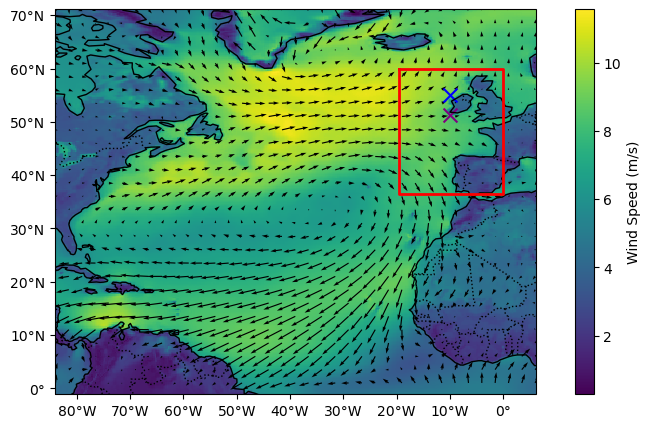

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# Ensure lon and lat are 2D arrays
lon, lat = np.meshgrid(slone, slate)

# Create the figure and axis with a geographic projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 5))

# Plot the wind speed as a colormap
color_map = ax.pcolormesh(lon, lat, wsera, shading='auto', cmap='viridis', transform=ccrs.PlateCarree())
cbar = fig.colorbar(color_map, ax=ax, orientation='vertical', label='Wind Speed (m/s)')

# Calculating arrow directions
u = u10era  # Component in x-direction
v = v10era  # Component in y-direction

# Add quiver plot for wind vectors (adjust `skip` to match data resolution)
skip = 10
ax.quiver(lon[::skip, ::skip], lat[::skip, ::skip], u[::skip, ::skip], v[::skip, ::skip], 
          scale=200, transform=ccrs.PlateCarree(), color='black')

# Add coastlines and geographic features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Draw the box for the domain extent (-19.5, 0, 56, 35)
extent = [-19.5, 0, 60, 36.5]  # [west, east, south, north]
ax.plot(
    [extent[0], extent[1], extent[1], extent[0], extent[0]],  # Longitudes
    [extent[2], extent[2], extent[3], extent[3], extent[2]],  # Latitudes
    color='red', linewidth=2, transform=ccrs.PlateCarree(), label='Domain Extent'
)
# Add "X" mark at location (19.5, 56.5)
marker_lon, marker_lat = -10, 51.2
ax.scatter(marker_lon, marker_lat, color='purple', marker='x', s=100, transform=ccrs.PlateCarree(), label='Marker (19.5, 56.5)')


marker_lon1, marker_lat1 = -10, 55
ax.scatter(marker_lon1, marker_lat1, color='blue', marker='x', s=100, transform=ccrs.PlateCarree(), label='Marker (19.5, 56.5)')
# Add gridlines and format ticks
#gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.01)
#gl.xlabels_top = False
#gl.ylabels_right = False
ax.set_xticks(np.arange(-80,5, 10), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(0, 72, 10), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

# Set title and legend
#ax.set_title('Mean MPI Wind 2018 with Domain Extent', fontsize=14)
#ax.legend(loc='upper left')

# Show the plot
#plt.savefig('era_2018_mean_wind_dir.png')
